In [ ]:
from google.colab import drive

drive.mount("/content/drive/")
!unzip /content/drive/MyDrive/Senior_project/klsg_dataset.zip

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from tqdm import tqdm
from PIL import Image
import cv2

import shutil
import glob
import os

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

## Data Prep

In [3]:
df = None
for label in os.listdir("/content/klsg_dataset"):
    image_files = glob.glob(f"/content/klsg_dataset/{label}/*.jpg") + glob.glob(f"/content/klsg_dataset/{label}/*.png")
    temp = pd.DataFrame({"image_path": image_files})
    temp["label"] = label
    df = pd.concat([df, temp]) if df is not None else temp

print(df.shape)
df.head()

(1912, 2)


,image_path,label
0,/content/klsg_dataset/ship/ship-175.png,ship
1,/content/klsg_dataset/ship/ship-126.png,ship
2,/content/klsg_dataset/ship/ship-277.png,ship
3,/content/klsg_dataset/ship/ship-122.png,ship
4,/content/klsg_dataset/ship/ship-152.png,ship


In [4]:
df['label'].value_counts()

,count
label,
mine,600
seafloor,578
ship,487
victim,181
plane,66


In [ ]:
train_df, val_df = train_test_split(df, test_size=0.3, stratify=df['label'], random_state=42)
train_df.reset_index(drop=True, inplace=True); val_df.reset_index(drop=True, inplace=True)

print(train_df.shape, val_df.shape)
train_df.head()

## YOLO

In [7]:
!pip install -q ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 56.1 MB/s eta 0:00:00


In [ ]:
for label in tqdm(os.listdir("/content/klsg_dataset")):
    os.makedirs(f'/content/yolo_data/train/{label}', exist_ok=True)
    os.makedirs(f'/content/yolo_data/val/{label}', exist_ok=True)

for _, row in train_df.iterrows():
    shutil.copy(row['image_path'], f'/content/yolo_data/train/{row["label"]}/{row["image_path"].split("/")[-1]}')
for _, row in val_df.iterrows():
    shutil.copy(row['image_path'], f'/content/yolo_data/val/{row["label"]}/{row["image_path"].split("/")[-1]}')

100%|██████████| 5/5 [00:00<00:00, 5347.15it/s]


In [ ]:
from ultralytics import YOLO

model = YOLO("yolo11n-cls.pt")

results = model.train(data="/content/yolo_data/", epochs=10, imgsz=224)

Ultralytics 8.3.184 🚀 Python-3.12.11 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/yolo_data/, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=10, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=224, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolo11n-cls.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train3, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, plots=True, pose=12.0, pretrained=Tru

YOLO11n-cls summary: 86 layers, 1,537,509 parameters, 1,537,509 gradients, 3.3 GFLOPs
Transferred 234/236 items from pretrained weights
AMP: running Automatic Mixed Precision (AMP) checks...
AMP: checks passed ✅
train: Fast image access ✅ (ping: 0.0±0.0 ms, read: 2795.6±1471.5 MB/s, size: 203.6 KB)


train: Scanning /content/yolo_data/train... 1338 images, 0 corrupt: 100%|██████████| 1338/1338 [00:00<?, ?it/s]


val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 1843.9±1784.2 MB/s, size: 257.1 KB)


val: Scanning /content/yolo_data/val... 574 images, 0 corrupt: 100%|██████████| 574/574 [00:00<?, ?it/s]


optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001111, momentum=0.9) with parameter groups 39 weight(decay=0.0), 40 weight(decay=0.0005), 40 bias(decay=0.0)
Image sizes 224 train, 224 val
Using 8 dataloader workers
Logging results to runs/classify/train3
Starting training for 10 epochs...

      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 18/18 [00:01<00:00, 13.96it/s]

                   all      0.936          1

      Epoch    GPU_mem       loss  Instances       Size



               classes   top1_acc   top5_acc: 100%|██████████| 18/18 [00:00<00:00, 48.44it/s]

                   all      0.956          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 18/18 [00:00<00:00, 45.16it/s]

                   all       0.96          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 18/18 [00:00<00:00, 37.90it/s]

                   all       0.96          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 18/18 [00:00<00:00, 36.22it/s]


                   all      0.963          1

      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 18/18 [00:00<00:00, 30.54it/s]

                   all      0.963          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 18/18 [00:00<00:00, 37.34it/s]

                   all      0.979          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 18/18 [00:00<00:00, 51.93it/s]

                   all      0.972          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 18/18 [00:00<00:00, 42.33it/s]


                   all      0.979          1

      Epoch    GPU_mem       loss  Instances       Size


      10/10     0.314G    0.07838         10        224: 100%|██████████| 84/84 [00:03<00:00, 23.61it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 18/18 [00:00<00:00, 34.63it/s]

                   all      0.983          1



10 epochs completed in 0.014 hours.
Optimizer stripped from runs/classify/train3/weights/last.pt, 3.2MB
Optimizer stripped from runs/classify/train3/weights/best.pt, 3.2MB

Validating runs/classify/train3/weights/best.pt...
Ultralytics 8.3.184 🚀 Python-3.12.11 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
YOLO11n-cls summary (fused): 47 layers, 1,532,429 parameters, 0 gradients, 3.2 GFLOPs
train: /content/yolo_data/train... found 1338 images in 5 classes ✅ 
val: /content/yolo_data/val... found 574 images in 5 classes ✅ 
test: None...


               classes   top1_acc   top5_acc: 100%|██████████| 18/18 [00:00<00:00, 34.31it/s]


                   all      0.983          1
Speed: 0.1ms preprocess, 0.5ms inference, 0.0ms loss, 0.0ms postprocess per image
Results saved to runs/classify/train3


In [51]:
predictions = []
for img in tqdm(val_df['image_path']):
    result = model.predict(img, verbose=False)
    label_map = result[0].names
    pred = label_map[result[0].probs.top1]
    predictions.append(pred)

val_df['pred'] = predictions

100%|██████████| 574/574 [00:05<00:00, 99.37it/s] 


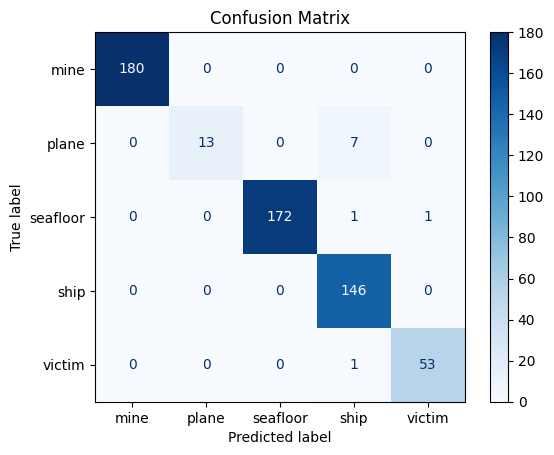

              precision    recall  f1-score   support

        mine       1.00      1.00      1.00       180
       plane       1.00      0.65      0.79        20
    seafloor       1.00      0.99      0.99       174
        ship       0.94      1.00      0.97       146
      victim       0.98      0.98      0.98        54

    accuracy                           0.98       574
   macro avg       0.98      0.92      0.95       574
weighted avg       0.98      0.98      0.98       574



In [52]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt

# Generate the confusion matrix
cm = confusion_matrix(val_df['label'], val_df['pred'], labels=le.classes_)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=le.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

print(classification_report(val_df['label'], val_df['pred']))